# Analyze the classifier model

## Imports

In [63]:
from joblib import load
from helpers.paths import Paths
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Load Dataset

In [64]:
model = load(Paths.CLASSIFIER_MODEL_DATA('RandomForestClassifier'))
model

RandomForestClassifier(max_features=0.5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=130, random_state=42)

In [65]:
importances = pd.DataFrame(
    {
        'Features': model.feature_names_in_, 
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)[:20]

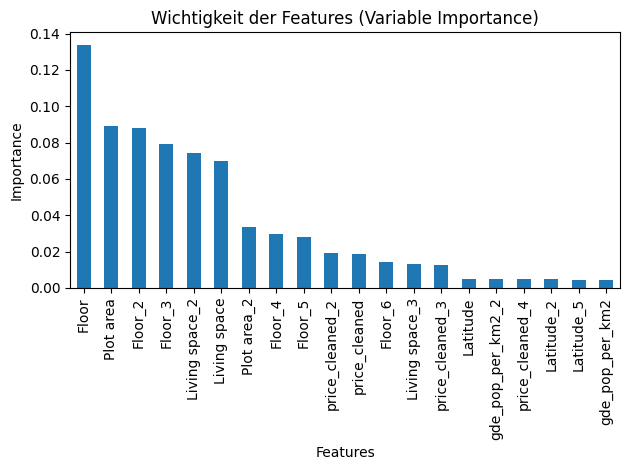

In [66]:
importances.plot.bar(
    x='Features', 
    y='Importance')

plt.title('Wichtigkeit der Features (Variable Importance)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend().remove()
plt.tight_layout()

plt.show()

## Confusion Matrix

In [32]:
data = load(Paths.CLASSIFIER_SCALING_DATA)['dataset']
data.head()

,Living space,Plot area,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,gde_area_nonproductive_percentage,...,WorkplaceDensity_2,WorkplaceDensity_3,WorkplaceDensity_4,WorkplaceDensity_5,WorkplaceDensity_6,ForestDensity_2,ForestDensity_3,ForestDensity_4,ForestDensity_5,ForestDensity_6
0,0.010330,0.002748,0.363636,0.808677,0.477811,0.464657,0.114461,0.349443,0.586349,0.051803,...,0.004779,0.000330,0.000023,1.578986e-06,1.091576e-07,0.094108,0.028869,0.008856,0.002717,8.334470e-04
1,0.016114,0.000633,0.314570,0.808677,0.477811,0.464657,0.114461,0.349443,0.586349,0.051803,...,0.004779,0.000330,0.000023,1.578986e-06,1.091576e-07,0.094108,0.028869,0.008856,0.002717,8.334470e-04
2,0.009606,0.002575,0.272727,0.799258,0.468164,0.462000,0.034049,0.129342,0.366948,0.080560,...,0.036712,0.007034,0.001348,2.582432e-04,4.948057e-05,0.008129,0.000733,0.000066,0.000006,5.372472e-07
3,0.015907,0.001054,0.181818,0.808677,0.477811,0.464657,0.114461,0.349443,0.586349,0.051803,...,0.004779,0.000330,0.000023,1.578986e-06,1.091576e-07,0.094108,0.028869,0.008856,0.002717,8.334470e-04
4,0.014668,0.003276,0.181818,0.803051,0.470341,0.464541,0.054848,0.377475,0.566478,0.013291,...,0.002871,0.000154,0.000008,4.415364e-07,2.365700e-08,0.068665,0.017993,0.004715,0.001235,3.237430e-04


In [33]:
X_complete = data.drop('type_unified', axis=1)
y_complete = data.type_unified

_, X, _, y_true = train_test_split(X_complete, y_complete, train_size=0.8, random_state=42)

In [80]:
y_pred = model.predict(X)
matrix = pd.crosstab(y_true, y_pred)

values = y_true.unique()

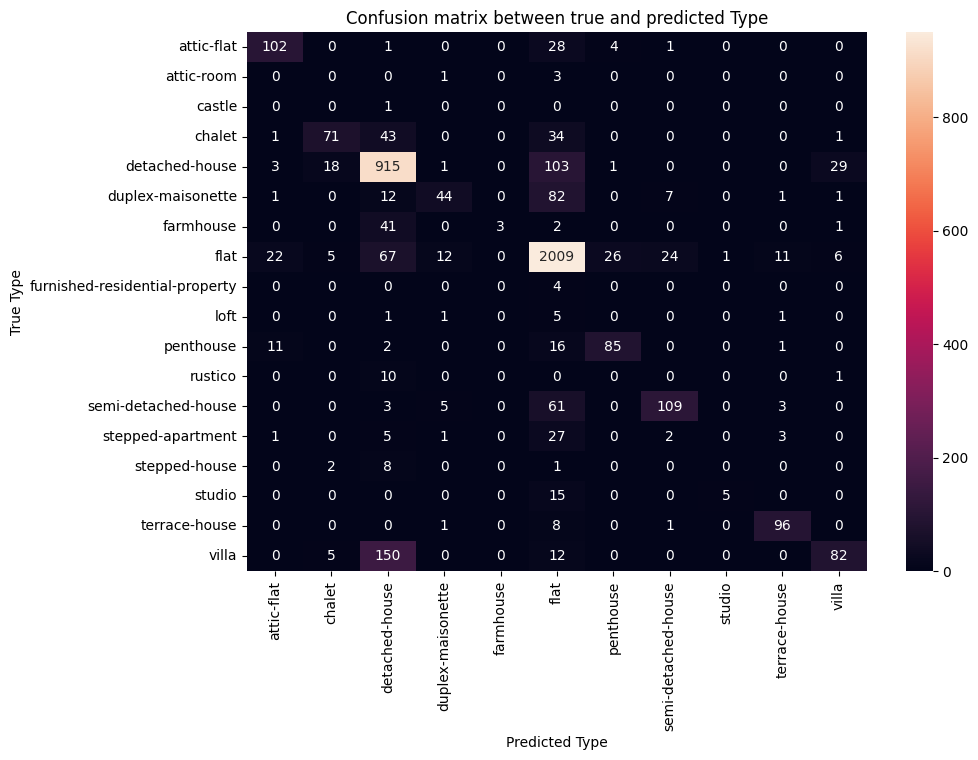

In [81]:
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True, fmt='g', vmin=0, vmax=950)
plt.xlabel(f'Predicted Type')
plt.ylabel(f'True Type')
plt.title(f'Confusion matrix between true and predicted Type')
plt.show()